In [1]:
import seaborn as sns

In [2]:
tips = sns.get_dataset_names()
print(tips)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
# load dataset
tips = sns.load_dataset("tips")
# display default 5 rows
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
# display last 5 rows
print(tips.tail())

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [8]:
# show shape
print(tips.shape)
# data types
print(tips.dtypes)

(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [9]:
# describe
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [14]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [16]:
# display the average total bill for each day of the week
print(tips.head().groupby("day")["total_bill"].mean())

day
Thur       NaN
Fri        NaN
Sat        NaN
Sun     19.322
Name: total_bill, dtype: float64


In [19]:
# display the minimum and maximum total bill each of the day
print(tips.head(100).groupby("day")["total_bill"].agg(["min", "max"]))

        min    max
day               
Thur  10.07  34.83
Fri    5.75  40.17
Sat    3.07  48.27
Sun    8.77  35.26


In [24]:
# display number of observation each day of the week
print(tips.head(5)["day"].value_counts())

Sun     5
Thur    0
Fri     0
Sat     0
Name: day, dtype: int64


In [26]:
# display percentage of observation for each day of week.
print(tips.head(10)["day"].value_counts(normalize=True)*100)

Sun     100.0
Thur      0.0
Fri       0.0
Sat       0.0
Name: day, dtype: float64


In [28]:
# Create a new column
tips["tip_percentage"] = tips["tip"]/ tips["total_bill"]
print(tips["tip_percentage"])

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_percentage, Length: 244, dtype: float64


In [30]:
print(tips.groupby("day")["tip_percentage"].mean())

day
Thur    0.161276
Fri     0.169913
Sat     0.153152
Sun     0.166897
Name: tip_percentage, dtype: float64


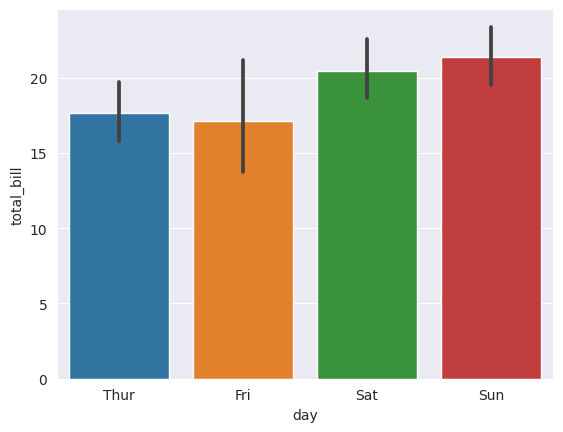

In [31]:
# Create chart showing the total bill for each day
import matplotlib.pyplot as plt

sns.barplot(x="day", y='total_bill',data=tips)
plt.show()

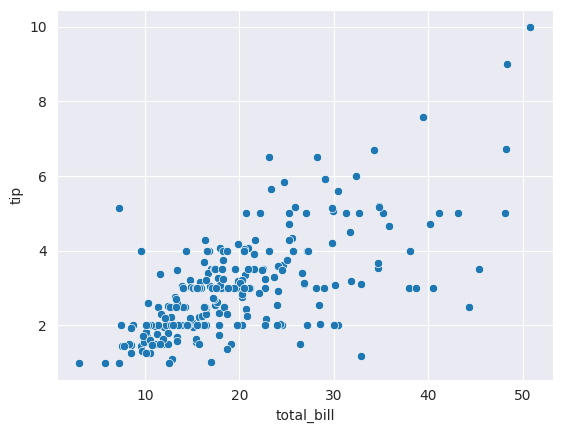

In [32]:
# Scatter plot
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female     No  Sun  Dinner     2        0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3        0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3        0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2        0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4        0.146808


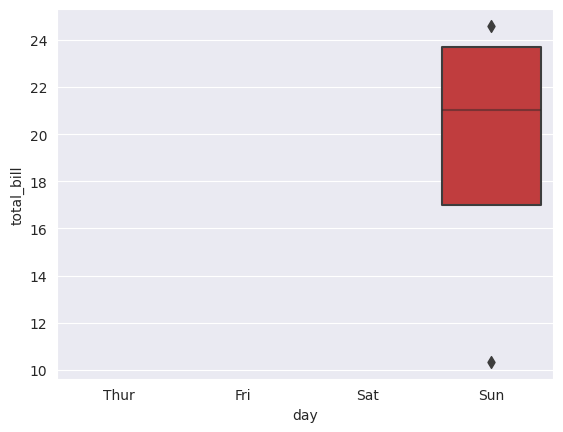

In [38]:
# Create a box plot showing the distribution of total bill for each day of the week.
print(tips.head())
sns.boxenplot(x="day", y="total_bill", data=tips.head())
plt.show()

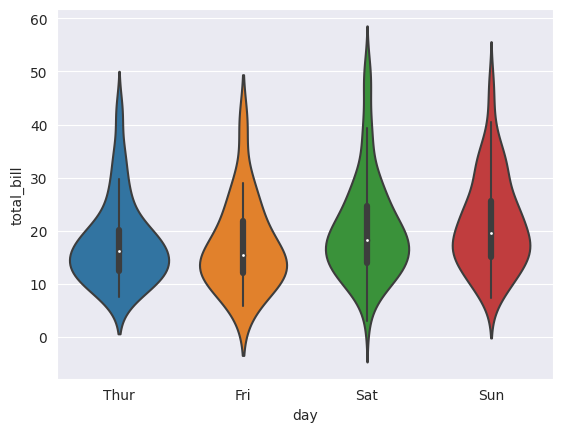

In [39]:
sns.violinplot(x="day", y='total_bill', data=tips)
plt.show()

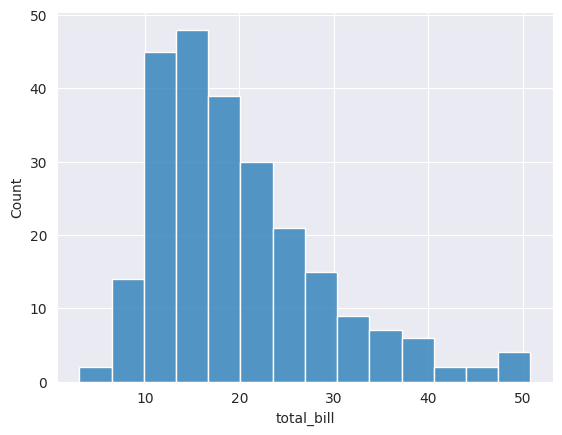

In [42]:
sns.histplot(x="total_bill", data=tips)
plt.show()

In [45]:
# heatmap showing the correlation between all numerical variables
# sns.heatmap(x="total_bill", data=tips)
# plt.show()

ValueError: could not convert string to float: 'Female'

In [46]:
print(tips.corr())

                total_bill       tip      size  tip_percentage
total_bill        1.000000  0.675734  0.598315       -0.338624
tip               0.675734  1.000000  0.489299        0.342370
size              0.598315  0.489299  1.000000       -0.142860
tip_percentage   -0.338624  0.342370 -0.142860        1.000000


/tmp/ipykernel_15377/3296971426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tips.corr())
